<a href="https://colab.research.google.com/github/AvHai/AvhishekNandi_09_AIML_Lab_Assignment/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import networkx as nx
import matplotlib.pyplot as plt


In [2]:
## Reading the facebook dataset
G = nx.read_edgelist('facebook_combined.txt')

In [3]:
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Is the graph directed: {G.is_directed()}")
print(f"Graph density: {nx.density(G)}")


Number of nodes: 4039
Number of edges: 88234
Is the graph directed: False
Graph density: 0.010819963503439287


In [15]:
### Specifiying the start node and goal node . (Trying to find path or mutuals between user '0' and user '100')
start_node = '5'
goal_node = '15'
if start_node not in G or goal_node not in G:
    raise ValueError("Start or goal node not in graph")


In [16]:
def bfs_shortest_path(graph, start, goal):
    try:
        return nx.shortest_path(graph, source=start, target=goal)
    except nx.NetworkXNoPath:
        return "No path found between the nodes."


In [17]:
def dfs_paths(graph, start):
    visited = set()
    stack = [start]

    while stack:
        node = stack.pop()
        if node not in visited:
            visited.add(node)
            # Add neighbors to stack
            stack.extend(set(graph[node]) - visited)
            yield node


In [18]:
bfs_path = bfs_shortest_path(G, start_node, goal_node)
print("BFS Shortest Path:", bfs_path)


BFS Shortest Path: ['5', '0', '15']


In [19]:
dfs_connections = list(dfs_paths(G, start_node))
print("DFS Connections:", dfs_connections)


DFS Connections: ['5', '316', '0', '103', '323', '285', '246', '339', '31', '142', '62', '161', '325', '222', '118', '268', '59', '172', '232', '212', '304', '7', '38', '322', '277', '120', '247', '29', '338', '308', '87', '213', '340', '324', '217', '171', '1387', '1678', '1491', '1735', '1128', '1835', '1717', '1471', '1201', '1608', '1530', '1795', '1146', '921', '1404', '1573', '1379', '1611', '1104', '1720', '1322', '1115', '1231', '1592', '1067', '1277', '1595', '954', '1830', '1650', '107', '1186', '1216', '1378', '1568', '903', '1601', '1424', '1889', '979', '1016', '1177', '987', '1240', '1203', '1307', '1511', '1676', '1825', '1553', '1579', '1098', '1360', '1045', '1788', '955', '1254', '1368', '1197', '1196', '946', '1287', '1078', '1447', '1180', '1665', '1516', '947', '1761', '952', '1086', '1273', '1725', '1089', '964', '1507', '1672', '1275', '1051', '1366', '1152', '1258', '1166', '1812', '1102', '1451', '1502', '1848', '1729', '1454', '1875', '896', '984', '1591', '11

In [20]:
pos = nx.spring_layout(G)

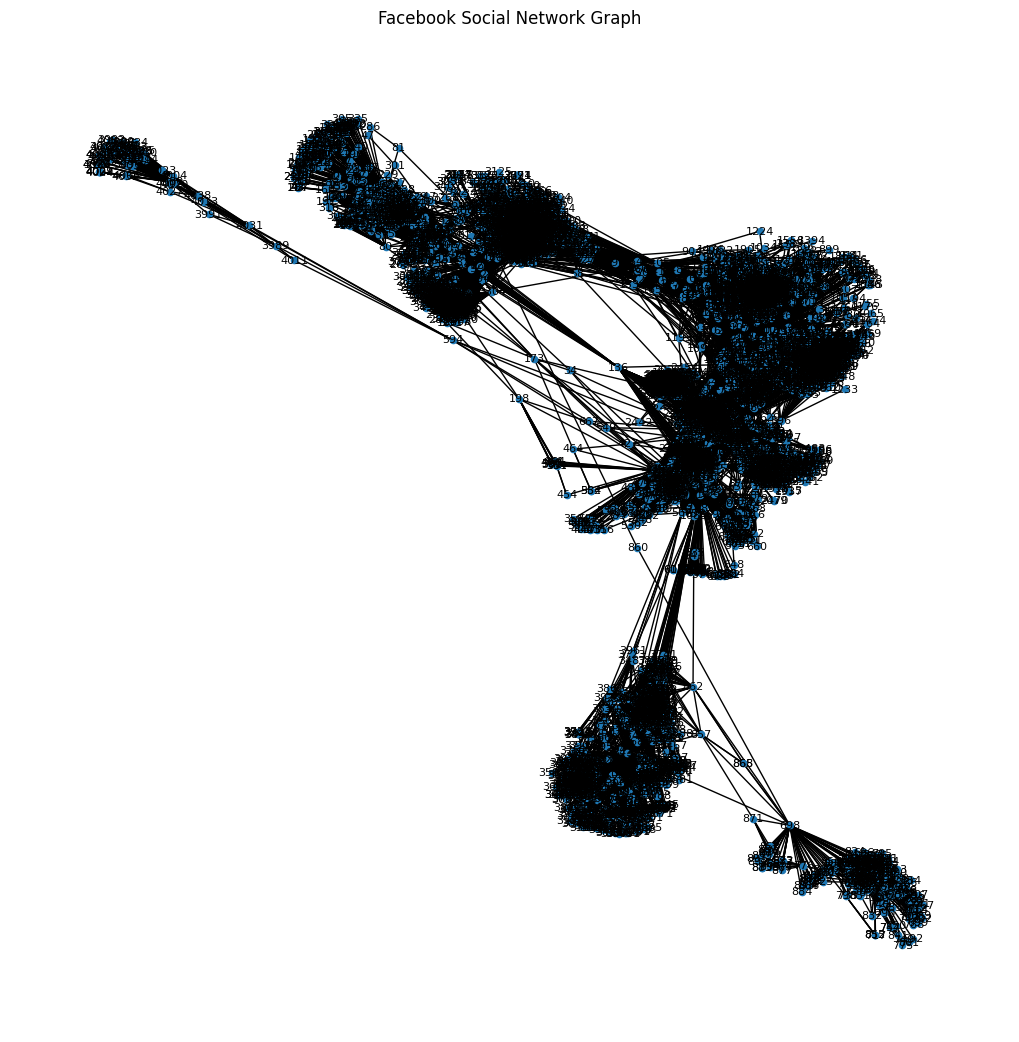

In [26]:
plt.figure(figsize=(10, 10))
nx.draw(G, pos, with_labels=True, node_size=20, font_size=8)
plt.title("Facebook Social Network Graph")
plt.show()


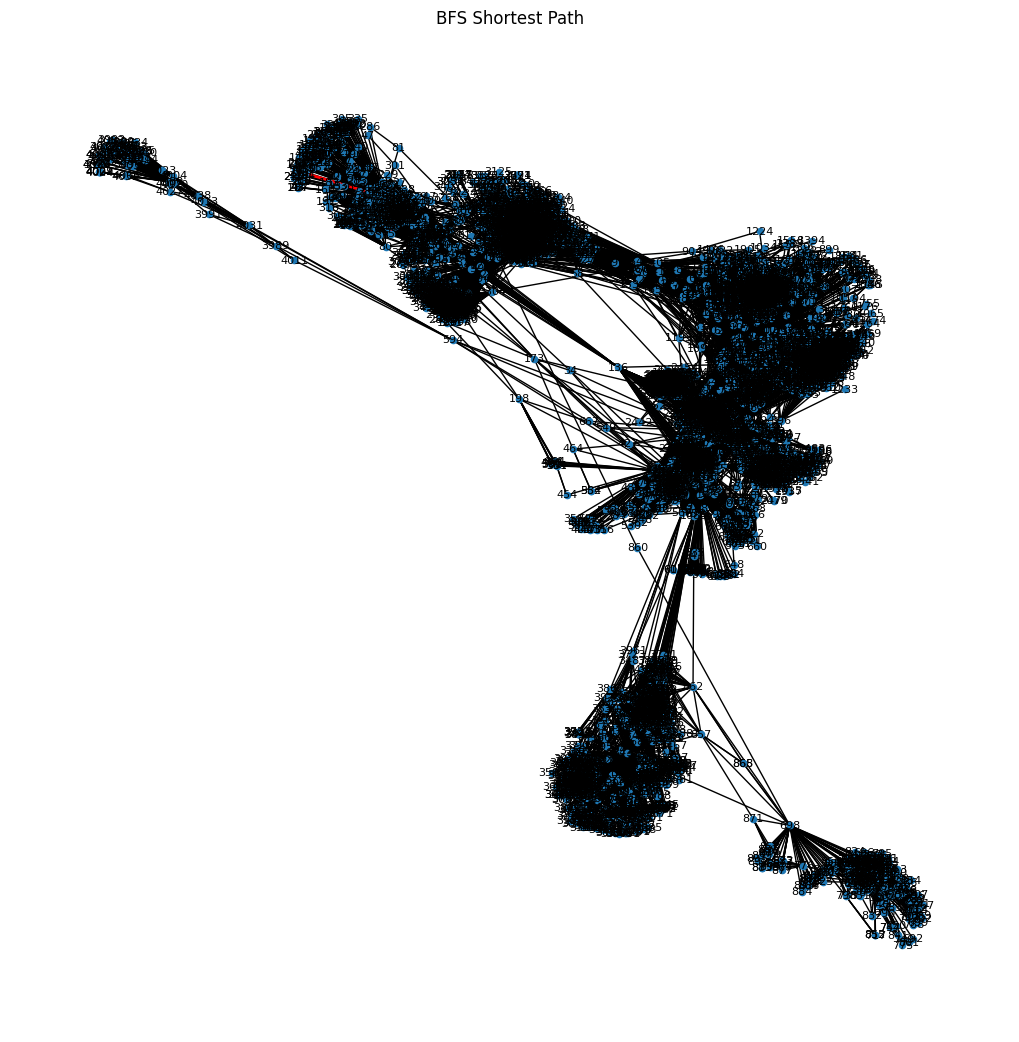

In [25]:
if bfs_path != "No path found between the nodes.":
    plt.figure(figsize=(10, 10))
    path_edges = list(zip(bfs_path, bfs_path[1:]))
    nx.draw(G, pos, with_labels=True, node_size=20, font_size=8)
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)
    plt.title("BFS Shortest Path")
    plt.show()


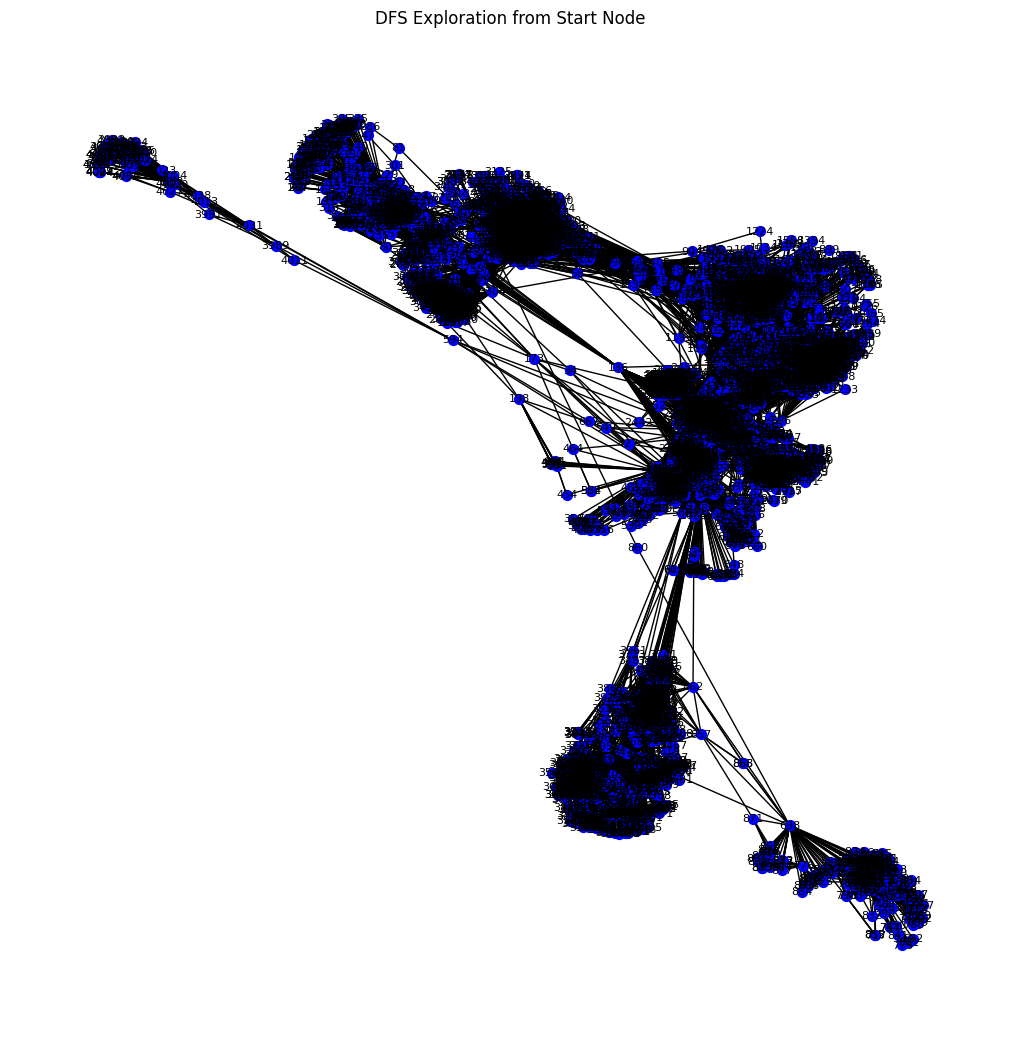

In [24]:
plt.figure(figsize=(10, 10))
nx.draw(G, pos, with_labels=True, node_size=20, font_size=8)
nx.draw_networkx_nodes(G, pos, nodelist=dfs_connections, node_color='b', node_size=50)
plt.title("DFS Exploration from Start Node")
plt.show()
